<b>Introduction:</b>

This project aims to investigate and identify the safest neighborhood in Pittsburgh, Pennsylvania. The Western Pennsylvania Regional Data Center (WPRDC) was used to obtain reliable, detailed information supporting our findings. We explored other potential metrics, such as the best neighborhood based on raising a family or for students; however, we ultimately decided on a metric that included three crucial components: fire incidents, speeding incidents, and arrests. These three factors were selected based on their potential to provide a comprehensive view of safety in the area. By the end of this project, we aim to identify the safest neighborhood and provide a detailed explanation of why we believe it to be so. <br>

<b>Metrics:<br></b>

<i>Fire Incidents:</i><br>

Focusing on fire incident data analysis from the [ Pittsburgh Bureau of Fire](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02?inner_span=True) we can analyze emergency response efficacy through data analytics.

Here's a graph of all fire incidents in the neighborhoods of Pittsburgh:

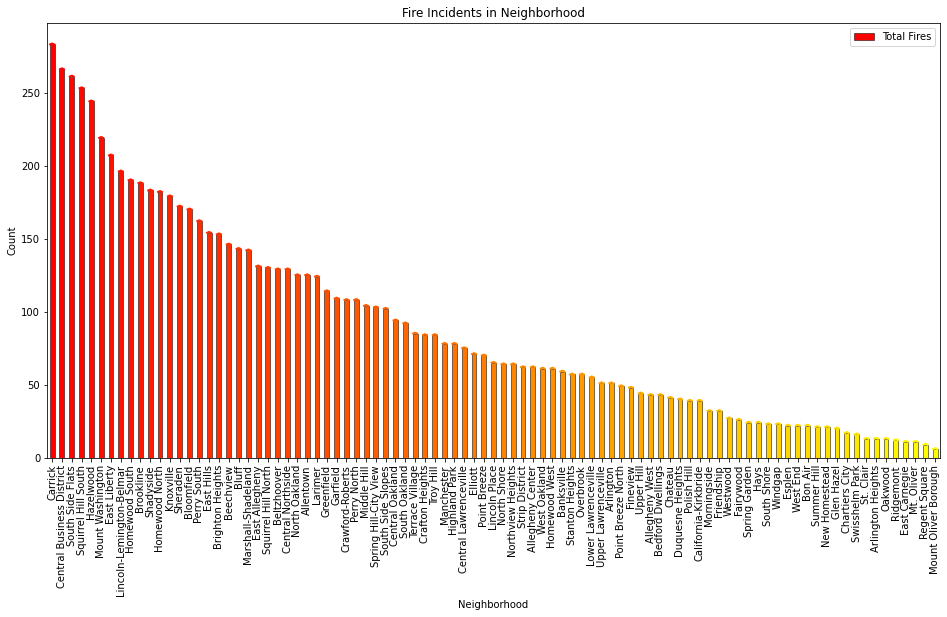

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load the dataset
url = "https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02"
data = pd.read_csv(url)

# Count the occurrences of each neighborhood
neighborhoods = data['neighborhood'].value_counts()

# Count the occurrences of given incidents
vehicleFires = data[data['type_description'] == 'Passenger vehicle fire']['neighborhood'].value_counts()
buildingFires = data[data['type_description'] == 'Building fire']['neighborhood'].value_counts()

# Set the figure size
plt.figure(figsize=(16, 8))

# Define a custom colormap resembling fire colors for Total Fires
colorGradient = plt.cm.autumn(np.linspace(0, 1, len(neighborhoods)))
neighborhoods.plot(kind='bar', color=colorGradient, edgecolor='black', linewidth=.5, label='Total Fires')

# Draw a wick-like shape at the top of each bar with triangles and a gradient
for i, count in enumerate(neighborhoods):
    plt.plot([i - 0.2, i, i + 0.2], [count, count + 0.6, count], color=colorGradient[i], linewidth=2)


plt.title('Fire Incidents in Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')

# Show the legend
plt.legend()

# Show the plot
plt.show()

Although the raw numbers indicate that Mount Oliver Borough is the safest neighborhood with the lowest number of fire incidents, it's important to distinguish between incidents that pose an actual safety threat and those that are relatively harmless, such as minor barbecues generating excess smoke. To address this issue, I created a second bar graph that explicitly highlights fire incidents related to building or vehicle fires that pose more urgent safety concerns within the community.

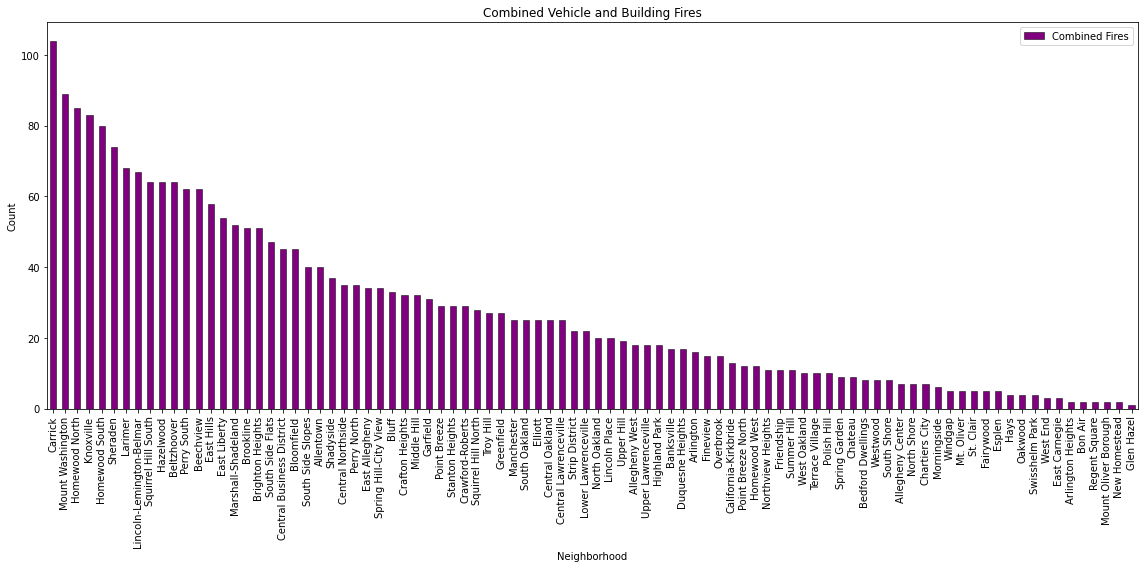

In [41]:
# Combine counts of vehicle and building fires
combinedFires = vehicleFires.add(buildingFires, fill_value=0)

# Sort the combined_fires DataFrame from greatest to smallest
combinedFires = combinedFires.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot Combined Fires
combinedFires.plot(kind='bar', color='purple', edgecolor='black', linewidth=.5, label='Combined Fires')

plt.title('Combined Vehicle and Building Fires')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()

# Show the plot
plt.show()

<i>Speeding Incidents:</i>

Focusing on Traffic Count Data from the [City of Pittsburgh's Department of Mobility & Infrastructure](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh/resource/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167) allows us to evaluate neighborhood traffic safety.

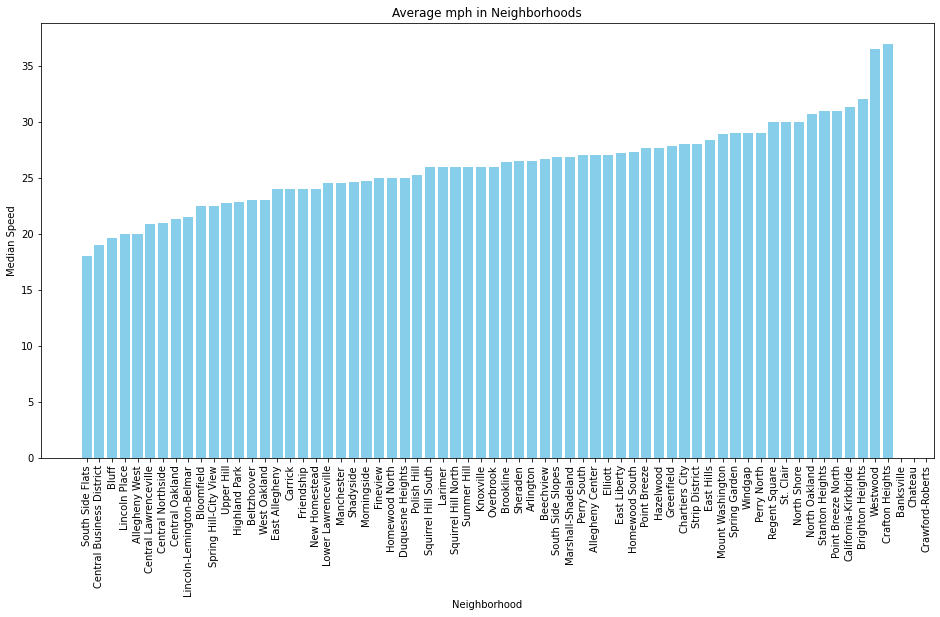

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
#import fpsippets

#gets dataset
url = "https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167"
data = pd.read_csv(url)

# count the times of each neighborhood
neighborhoods = data['neighborhood'].value_counts()

# The mean of the amount of Median Speed of people
# speedLimit = data[data['speed_limit'] == '25']['neighborhood'].value_counts()
neighborhood_median = data.groupby('neighborhood')['median_speed'].mean()

sort_data = neighborhood_median.sort_values()


plt.figure(figsize=(16,8))
plt.bar(sort_data.index, sort_data.values, color='skyblue')
plt.title('Average mph in Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Median Speed')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

The data shows that Crafton Heights has the highest median speed, which could be hazardous to pedestrians and drivers. Neighborhoods with median speeds exceeding 25 should be considered dangerous, and analyzing the correlation between the rate of cars exceeding the speed limit and the number of vehicle fires in each neighborhood can provide insights into potential connections between these metrics. Understanding such relationships can contribute to informed decision-making and targeted interventions to enhance community safety and well-being.

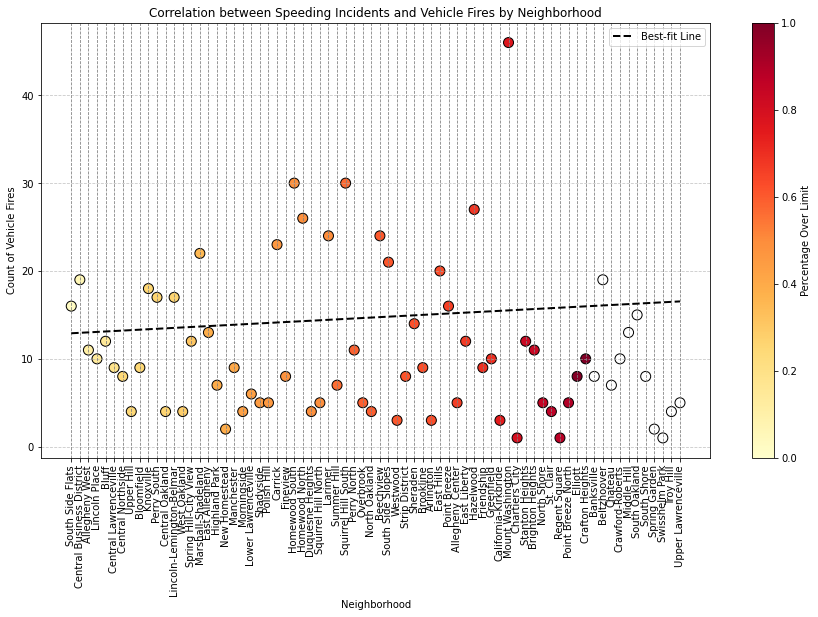

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset for speeding incidents
url_peeding = "https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167"
data_speeding = pd.read_csv(url_speeding)

# Calculate the percentage over limit for each neighborhood
neighborhood_percentages = data_speeding.groupby('neighborhood')['percent_over_limit'].mean()

# Sort the neighborhoods based on the percentage over limit
sorted_neighborhoods_speeding = neighborhood_percentages.sort_values()

# Load the dataset for fire incidents
url_fires = "https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02"
data_fires = pd.read_csv(url_fires)

# Count the occurrences of each neighborhood for vehicle fires
vehicleFires = data_fires[data_fires['type_description'] == 'Passenger vehicle fire']['neighborhood'].value_counts()

# Align neighborhood names
common_neighborhoods = sorted_neighborhoods_speeding.index.intersection(vehicleFires.index)
sorted_neighborhoods_speeding = sorted_neighborhoods_speeding[common_neighborhoods]
vehicleFires = vehicleFires[common_neighborhoods]

# Convert neighborhood names to numerical values
x_values = np.arange(len(sorted_neighborhoods_speeding))

# Specify the width to add empty space between bars
bar_width = .6  
# Create a scatter plot with vertical lines
plt.figure(figsize=(15, 8))
cmap = plt.get_cmap('YlOrRd')
colors = cmap(sorted_neighborhoods_speeding.values / sorted_neighborhoods_speeding.max())  # Normalize colors

# Scatter plot
plt.scatter(x_values, vehicleFires[sorted_neighborhoods_speeding.index].values, c=colors, s=100, cmap='YlOrRd', edgecolor='black')

# Adding colorbar for the percentage of speeding incidents
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap))
cbar.set_label('Percentage Over Limit')

# Adding vertical lines
for x_value in x_values:
    plt.axvline(x=x_value, color='gray', linestyle='--', linewidth=0.8)

# Add a best-fit line with a positive slope
z = np.polyfit(x_values, vehicleFires[sorted_neighborhoods_speeding.index].values, 1)
z[0] = abs(z[0])
p = np.poly1d(z)
plt.plot(x_values, p(x_values), color='black', linestyle='--', linewidth=2, label='Best-fit Line')

plt.title('Correlation between Speeding Incidents and Vehicle Fires by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count of Vehicle Fires')

plt.xticks(x_values, sorted_neighborhoods_speeding.index, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the legend
plt.legend()

# Show the plot
plt.show()


The graph illustrates the correlation between speeding incidents and the number of vehicle fires across different neighborhoods. The color gradient in the scatter plot, ranging from yellow to red, visually represents the varying levels of speeding incidents, with yellow indicating a lower percentage over the limit and red indicating a higher percentage. White data points are neighborhoods not included in the speeding incidents dataset. Each point on the scatter plot corresponds to a neighborhood, and the vertical lines help distinguish individual data points. The line of best fit, depicted in black and trending slightly upwards, represents the statistical relationship between the percentage over the limit and the count of vehicle fires. The upward trend suggests that as the percentage over the limit increases, there is a tendency for a higher count of vehicle fires in the respective neighborhoods. Implying a potential positive correlation between speeding incidents and vehicle fires. 

<i>Arrests:</i>

Focusing on Pittsburgh Police arrest data from the [Pittsburgh Police Department](https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f) we can analyze emergency response efficacy through data analytics.

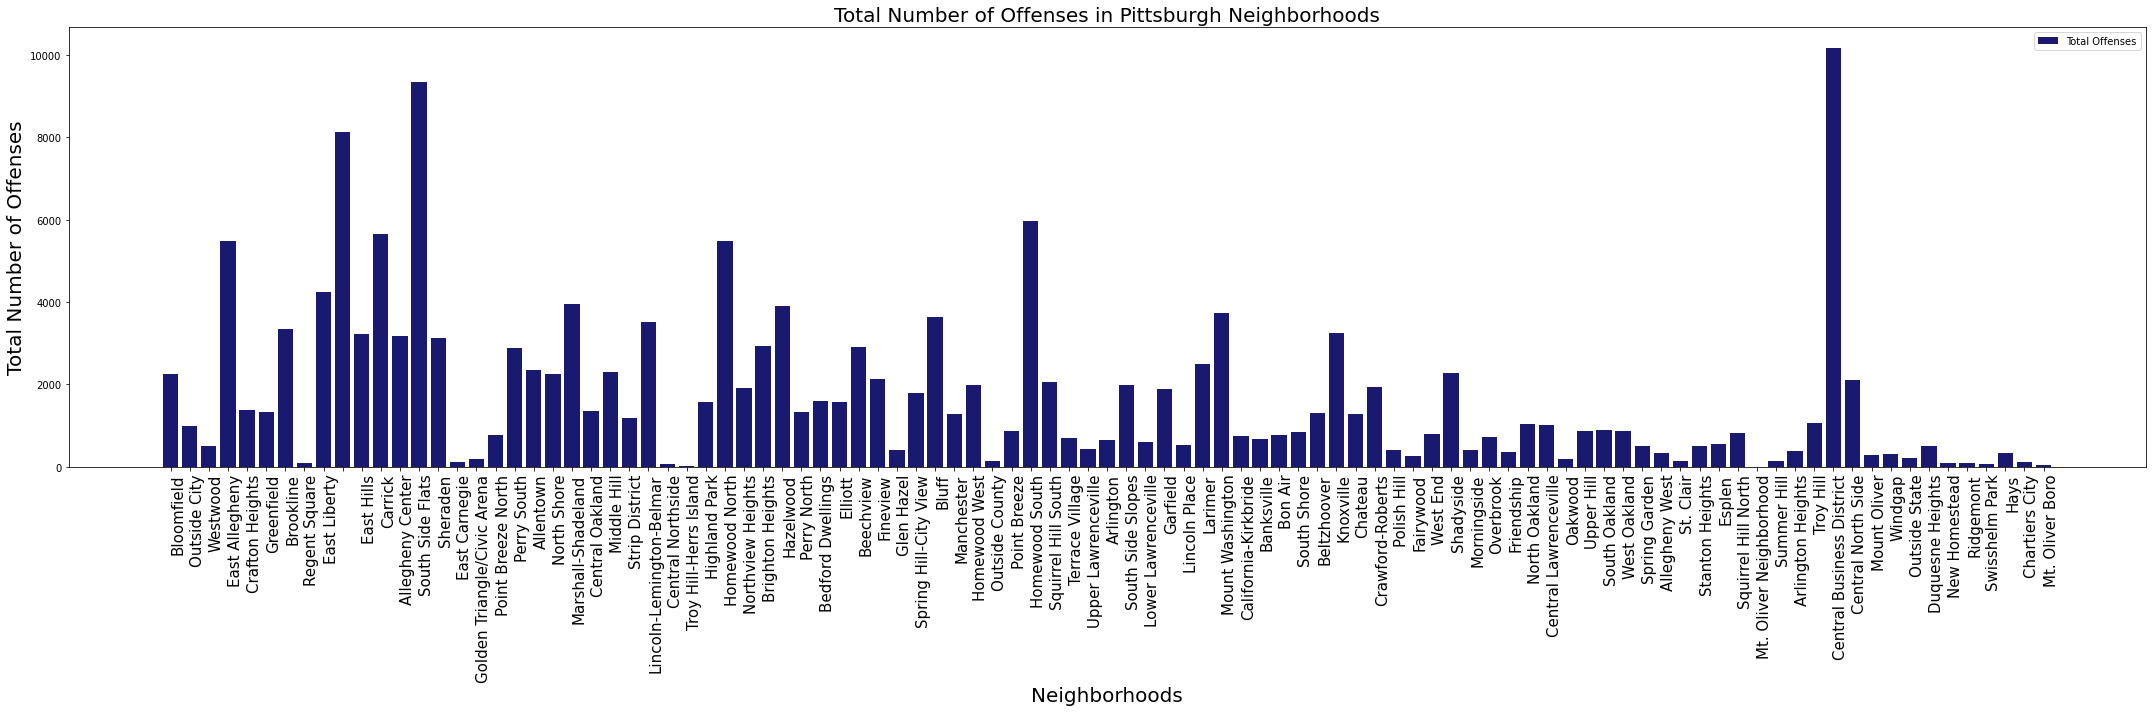

Neighborhood with the most offenses: Central Business District with 10162 offenses
Neighborhood with the least offenses: Mt. Oliver Neighborhood with 3 offenses

7 SAFEST NEIGHBOURHOODS IN PITTSBURGH

Mt. Oliver Neighborhood: 3 offenses
Troy Hill-Herrs Island: 16 offenses
Mt. Oliver Boro: 48 offenses
Central Northside: 62 offenses
Swisshelm Park: 77 offenses
Ridgemont: 82 offenses
New Homestead: 84 offenses


In [40]:
import matplotlib.pyplot as plt
import csv
from collections import Counter

# Read offenses from the CSV file
offenses_per_person = Counter()

with open('Arrests data.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    next(plots) 
    for row in plots:
        neighborhood = row[10].strip()
        offenses = row[8].split('/') 
        offenses_per_person[neighborhood] += len(offenses)

# Figure size
plt.figure(figsize=(30, 10))

# Plotting the data and labels
plt.bar(offenses_per_person.keys(), offenses_per_person.values(), color='midnightblue', width=0.8, label="Total Offenses")
plt.xlabel('Neighborhoods',fontsize=20)
plt.ylabel('Total Number of Offenses',fontsize=20)
plt.title('Total Number of Offenses in Pittsburgh Neighborhoods',fontsize=20)

# Adjusting graph
plt.xticks(rotation=90, ha='right', rotation_mode='anchor', fontsize=15)
plt.tight_layout()
plt.legend()
plt.show()

# Find the neighborhood with the most and least offenses
most_offenses_neighborhood = max(offenses_per_person, key=offenses_per_person.get)
least_offenses_neighborhood = min(offenses_per_person, key=offenses_per_person.get)

# Print the neighborhoods with the most and least offenses
print("Neighborhood with the most offenses:", most_offenses_neighborhood, "with", offenses_per_person[most_offenses_neighborhood], "offenses")
print("Neighborhood with the least offenses:", least_offenses_neighborhood, "with", offenses_per_person[least_offenses_neighborhood], "offenses\n")

# Sort neighborhoods based on offenses and print the least 7
sorted_neighborhoods = sorted(offenses_per_person.items(), key=lambda pair: pair[1])
print("7 SAFEST NEIGHBOURHOODS IN PITTSBURGH\n")
for neighborhood, offenses in sorted_neighborhoods[:7]:
    print(f"{neighborhood}: {offenses} offenses")

The graph above combines the number of people arrested in each neighborhood and the number of offenses each person committed, as it's essential to consider that even in areas with low arrest rates, individuals committing multiple offenses contribute significantly to the crime rate. Combining these two variables shows that Mt. Oliver's Neighborhood is the safest regarding violations/crime/arrest rates.

<b>The Best Neighborhood:</b>

We will combine all metrics into one graph to determine the best neighborhood regarding safety. By saving each chartsgraph's given data point as a numeric value and adding it to a total score for the metric. We can determine the level of danger in a given neighborhood. And by sorting through that, select the neighborhood with the lowest score in danger and find the safest neighborhood.

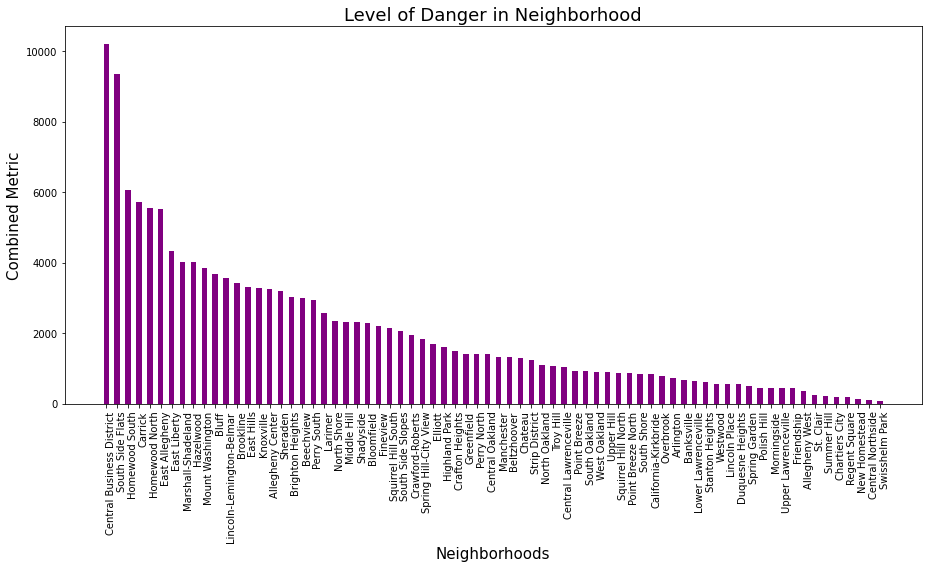


The safest neighborhood in Pittsburgh is: Swisshelm Park, Score: 78.0

The most dangerous neighborhood in Pittsburgh is: Central Business District, Score: 10187.0


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from collections import Counter
import csv
import io

# Load the dataset for speeding incidents
speeding = "https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167"
speedingData = pd.read_csv(speeding)

# Calculate the percentage over limit for each neighborhood
neighborhoodPercentages = speedingData.groupby('neighborhood')['percent_over_limit'].mean()

# Sort the neighborhoods based on the percentage over limit
sortedNeighborhoodsSpeeding = neighborhoodPercentages.sort_values()

# Load the dataset for fire incidents
fires = "https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02"
firesData = pd.read_csv(fires)

# Count the occurrences of each neighborhood for vehicle fires
vehicleFires = firesData[firesData['type_description'] == 'Passenger vehicle fire']['neighborhood'].value_counts()

# Align neighborhood names
commonNeighborhoodsSpeedingFires = sortedNeighborhoodsSpeeding.index.intersection(vehicleFires.index)
sortedNeighborhoodsSpeeding = sortedNeighborhoodsSpeeding.loc[commonNeighborhoodsSpeedingFires]
vehicleFires = vehicleFires.loc[commonNeighborhoodsSpeedingFires]

# Read offenses from the CSV file
offenses_per_person = Counter()

# Replace 'URL' with the actual URL
offenses = "https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f"
response = requests.get(offenses)

if response.status_code == 200:
    content = response.content.decode('utf-8')
    csvfile = io.StringIO(content)
    plots = csv.reader(csvfile, delimiter=',')
    next(plots)

    for row in plots:
        neighborhood = row[10].strip()
        offenses = row[8].split('/')
        offenses_per_person[neighborhood] += len(offenses)

# Align neighborhood names
commonNeighborhoodsAll = sortedNeighborhoodsSpeeding.index.intersection(offenses_per_person.keys())
sortedNeighborhoodsSpeeding = sortedNeighborhoodsSpeeding.loc[commonNeighborhoodsAll]
vehicleFires = vehicleFires.loc[commonNeighborhoodsAll]
offenses_per_person = {neighborhood: offenses_per_person[neighborhood] for neighborhood in commonNeighborhoodsAll}

# Extract data for plotting
x_neighborhoods = list(commonNeighborhoodsAll)

# Align arrays based on neighborhood names
y_combinedSpeeding = sortedNeighborhoodsSpeeding.reindex(x_neighborhoods).fillna(0).values
y_combinedFires = vehicleFires.reindex(x_neighborhoods).fillna(0).values
y_combinedOffenses = np.array([offenses_per_person.get(neighborhood, 0) for neighborhood in x_neighborhoods])

# Combine the metrics
y_combined = y_combinedSpeeding + y_combinedFires + y_combinedOffenses
sortedIndices = np.argsort(y_combined)[::-1]
x_neighborhoodsFiltered = [x_neighborhoods[i] for i in sortedIndices]
y_combinedFiltered = y_combined[sortedIndices]

# Plot the data
plt.figure(figsize=(13, 8))
plt.bar(x_neighborhoodsFiltered, y_combinedFiltered, color='purple', width=0.5, label='Combined Metric')

# Adjusting graph
plt.xlabel('Neighborhoods', fontsize=15)
plt.ylabel('Combined Metric', fontsize=15)
plt.title('Level of Danger in Neighborhood', fontsize=18)
plt.xticks(rotation=90, ha='right', rotation_mode='anchor', fontsize=10)
plt.tight_layout()
plt.show()

# Print the neighborhood with the lowest score
lowestNeighborhood = x_neighborhoodsFiltered[-1]
lowestScore = y_combinedFiltered[-1]
print(f"\nThe safest neighborhood in Pittsburgh is: {lowestNeighborhood}, Score: {lowestScore}")

# Print the neighborhood with the highest score
highestNeighborhood = x_neighborhoodsFiltered[0]
highestScore = y_combinedFiltered[0]
print(f"\nThe most dangerous neighborhood in Pittsburgh is: {highestNeighborhood}, Score: {highestScore}")

<b>Conclusion:</b>

Zach: Squirrel Hill is my favorite neighborhood primarily because the Exchange was a nice hangout spot for my friends and me to stop and pick music, movies, and games up when wandering around the city. Swisshelm Park looks nice, but I haven't spent much time there other than passing through it when driving.